In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
class ParticlePmf(pd.Series):
    
    def update_set(self, dataset):
        for data in dataset:
            for lam in self.index:
                self.at[lam] *= self.like(data, lam)
        self.normalize()
    
    def like(self, data, lam):
        return stats.expon.pdf(data, scale=(1/lam))
    
    def normalize(self):
        self *= 1 / self.sum()
    
    def max_likelihood(self):
        return self[(self==self.max())].index[0]


Max Likelihood of Lambda: 0.21119119119119117


Text(0.5,1,'Distribution of Lambda')

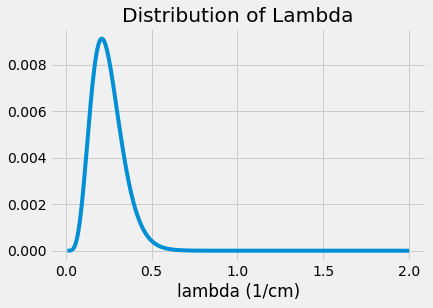

In [8]:
l_min = .01
l_max = 2
xs = np.linspace(l_min,l_max,1000)

dataset = [1.5,2,3,4,5,12]
p_pmf = ParticlePmf([stats.expon.pdf(x) for x in xs], index=xs)
p_pmf.update_set(dataset)

max_like = p_pmf.max_likelihood()
print('Max Likelihood of Lambda:',max_like)

plot = p_pmf.plot()
plot.set_xlabel('lambda (1/cm)')
plot.set_title('Distribution of Lambda')

Text(0.5,0,'x (cm)')

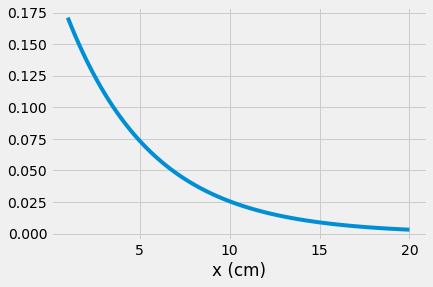

In [6]:
xs = np.linspace(1,20,100)
x_pmf = pd.Series([stats.expon.pdf(x, scale=1/max_like) for x in xs],
                  index=xs)

plot = x_pmf.plot()
plot.set_xlabel('x (cm)')